# LSTM Training

In [9]:
import sys
import numpy as np
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [10]:
# convert series to supervised learning
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(data) is list else data.shape[1]
#     df = DataFrame(data)
#     cols, names = list(), list()
#     # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#         names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
#     # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#         if i == 0:
#             names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
#         else:
#             names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
#     # put it all together
#     agg = concat(cols, axis=1)
#     agg.columns = names
#     # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg

In [11]:
# load dataset
dataset = read_csv('datasets/bss/dublin/reorg/station_2.csv')

dataset = dataset.drop('TIME', axis=1)
# print(dataset.head())
values = dataset.values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = scaled

print(scaled)

[[0.         0.5226481  0.58082193 0.5       ]
 [0.         0.5261324  0.58082193 0.5       ]
 [0.         0.5296167  0.58082193 0.5       ]
 ...
 [0.05       0.9930314  0.         0.8333334 ]
 [0.05       0.9965157  0.         0.8333334 ]
 [0.05       1.         0.         0.8333334 ]]


In [12]:
# split into train and test sets
# values = reframed.values

train_start = 0
train_end = 8760

test_start = 99144
test_end = 108071

n_train_hours = 365 * 24
train = scaled[train_start:train_end, :]
test = scaled[test_start:test_end, :]
# train = values[train_start:train_end, :]
# test = values[test_start:test_end, :]

# split into input and outputs
train_X, train_y = train[:, 1:], train[:, 1]
test_X, test_y = test[:, 1:], test[:, 1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 3) (8760,) (8927, 1, 3) (8927,)


Epoch 1/150
122/122 [==============================] - 5s 11ms/step - loss: 0.4197 - val_loss: 0.1791
Epoch 2/150
122/122 [==============================] - 1s 4ms/step - loss: 0.1645 - val_loss: 0.1138
Epoch 3/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0922 - val_loss: 0.0229
Epoch 4/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0173 - val_loss: 0.0084
Epoch 5/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 6/150
122/122 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0067
Epoch 7/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0075 - val_loss: 0.0059
Epoch 8/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0078 - val_loss: 0.0051
Epoch 9/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0065 - val_loss: 0.0060
Epoch 10/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0063 - val_l

122/122 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0084
Epoch 82/150
122/122 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.0060
Epoch 83/150
122/122 [==============================] - 0s 4ms/step - loss: 0.0039 - val_loss: 0.0082
Epoch 84/150
122/122 [==============================] - 1s 5ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 85/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0037
Epoch 86/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 87/150
122/122 [==============================] - 1s 4ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch 88/150
122/122 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0066
Epoch 89/150
122/122 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.0037
Epoch 90/150
122/122 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 

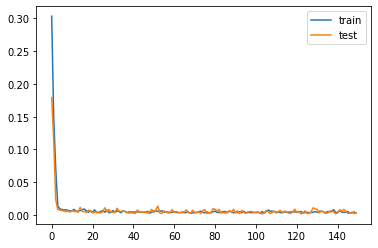

In [13]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=72, validation_data=(test_X, test_y), verbose=1,
                    shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [14]:
# make a prediction
yhat = model.predict(test_X)
# print(test_X)
# print(yhat)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE

# np.set_printoptions(threshold=sys.maxsize)
# temp = concatenate((inv_y, inv_yhat))
# print(temp)
# print(inv_y)
# print(inv_yhat)

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
mae = mean_absolute_error(inv_y, inv_yhat)
mse = mean_squared_error(inv_y, inv_yhat)
print('Test MAE: %.3f' % mae)
print('Test RMSE: %.3f' % rmse)



Test MAE: 0.050
Test RMSE: 0.070


In [20]:
attr_list = [
    'int_time',
    'int_date',
    'int_day',
    'rain',
    'temp',
    'rhum'
]

def powerset(s):
    x = len(s)
    masks = [1 << i for i in range(x)]
    for i in range(1 << x):
        yield [ss for mask, ss in zip(masks, s) if i & mask]
    
print(list(powerset([1,2,3])))

[[], [4], [5], [4, 5], [6], [4, 6], [5, 6], [4, 5, 6]]
